<a href="https://colab.research.google.com/github/Surovytskyi/weather-forecast/blob/main/average_temperature_forecast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# installing NeuralProphet is a library for modeling time-series data
!pip install neuralprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# importing necessary libraries
import pandas as pd
import numpy as np
from neuralprophet import NeuralProphet
import matplotlib.pyplot as plt

In [3]:
# connecting Google Colab with Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
cd drive/MyDrive/weather-prediction

/content/drive/MyDrive/weather-prediction


In [5]:
# reading our historical Kyiv weather data
df = pd.read_csv("kyiv_weather_history.csv")

In [6]:
# view our data
df

,STATION,NAME,DATE,PRCP,SNWD,TAVG,TMAX,TMIN
0,UPM00033342,"NEMESHAEVO, UP",2000-03-26,NaN,NaN,NaN,NaN,55.0
1,UPM00033342,"NEMESHAEVO, UP",2000-04-25,NaN,NaN,NaN,70.0,NaN
2,UPM00033342,"NEMESHAEVO, UP",2000-04-26,NaN,NaN,NaN,74.0,55.0
3,UPM00033342,"NEMESHAEVO, UP",2000-04-27,NaN,NaN,74.0,73.0,53.0
4,UPM00033342,"NEMESHAEVO, UP",2000-04-28,NaN,NaN,73.0,76.0,60.0
...,...,...,...,...,...,...,...,...
23342,UPM00033345,"KIEV, UP",2022-05-30,0.14,NaN,60.0,66.0,55.0
23343,UPM00033345,"KIEV, UP",2022-05-31,NaN,NaN,60.0,65.0,57.0
23344,UPM00033345,"KIEV, UP",2022-06-01,NaN,NaN,69.0,81.0,56.0
23345,UPM00033345,"KIEV, UP",2022-06-02,NaN,NaN,74.0,84.0,NaN


In [7]:
# data type of each column
df.dtypes

STATION     object
NAME        object
DATE        object
PRCP       float64
SNWD       float64
TAVG       float64
TMAX       float64
TMIN       float64
dtype: object

In [8]:
# convert data type in date column to datetime object
df ['DATE'] = pd.to_datetime(df ['DATE'])

In [9]:
# look at our change
df.dtypes

STATION            object
NAME               object
DATE       datetime64[ns]
PRCP              float64
SNWD              float64
TAVG              float64
TMAX              float64
TMIN              float64
dtype: object

In [10]:
# remove cities except for Kyiv from data frame
df_kyiv = df[df.NAME == 'KIEV, UP']

In [11]:
# remove unwanted columns
df_kyiv = df_kyiv.drop(columns=['STATION', 'NAME'])

In [12]:
# view our data
df_kyiv

,DATE,PRCP,SNWD,TAVG,TMAX,TMIN
12816,1992-12-31,0.02,1.6,21.0,26.0,15.0
12817,1993-01-01,0.01,2.0,10.0,16.0,7.0
12818,1993-01-02,0.00,2.0,2.0,11.0,-3.0
12819,1993-01-03,0.00,2.0,5.0,14.0,-4.0
12820,1993-01-04,0.00,2.0,14.0,20.0,6.0
...,...,...,...,...,...,...
23342,2022-05-30,0.14,NaN,60.0,66.0,55.0
23343,2022-05-31,NaN,NaN,60.0,65.0,57.0
23344,2022-06-01,NaN,NaN,69.0,81.0,56.0
23345,2022-06-02,NaN,NaN,74.0,84.0,NaN


In [13]:
# number of missing values in columns
df_kyiv.isnull().sum()

DATE       0
PRCP    4619
SNWD    8331
TAVG      29
TMAX    1896
TMIN    3834
dtype: int64

In [14]:
# fill in the missing values in the TMAX column based on the TAVG column that does not have a missing value and TMAX mean value
df_kyiv['TMAX'] = np.where(df_kyiv['TAVG'].isna() == False, df_kyiv['TAVG'] + round(df_kyiv['TMAX'].mean() - df_kyiv['TAVG'].mean()), df_kyiv['TMIN'])

In [15]:
# fill in the missing values in the TMIN column based on the TAVG column that does not have a missing value and TMIN mean value
df_kyiv['TMIN'] = np.where(df_kyiv['TAVG'].isna() == False, df_kyiv['TAVG'] - round(df_kyiv['TAVG'].mean() - df_kyiv['TMIN'].mean()), df_kyiv['TMAX'])

In [16]:
# days in which any temperature indicators are not filled in, fill in the values from the previous days
df_kyiv['TMAX'] = df_kyiv['TMAX'].fillna(method ='pad')
df_kyiv['TMIN'] = df_kyiv['TMIN'].fillna(method ='pad')
df_kyiv['TAVG'] = df_kyiv['TAVG'].fillna(method ='pad')

In [17]:
# convert temperature from Fahrenheit to Celsius
df_kyiv['TMAX'] = df_kyiv['TMAX'].apply(lambda x: round((x - 32)/1.8, 1))
df_kyiv['TMIN'] = df_kyiv['TMIN'].apply(lambda x: round((x - 32)/1.8, 1))
df_kyiv['TAVG'] = df_kyiv['TAVG'].apply(lambda x: round((x - 32)/1.8, 1))

In [18]:
# fill in columns PRCP and SNWD with zeros, which indicate zero rain and snow
df_kyiv = df_kyiv.fillna(0.0)

In [19]:
# number of missing values in columns
df_kyiv.isnull().sum()

DATE    0
PRCP    0
SNWD    0
TAVG    0
TMAX    0
TMIN    0
dtype: int64

In [20]:
# view our data
df_kyiv

,DATE,PRCP,SNWD,TAVG,TMAX,TMIN
12816,1992-12-31,0.02,1.6,-6.1,-1.1,-10.6
12817,1993-01-01,0.01,2.0,-12.2,-7.2,-16.7
12818,1993-01-02,0.00,2.0,-16.7,-11.7,-21.1
12819,1993-01-03,0.00,2.0,-15.0,-10.0,-19.4
12820,1993-01-04,0.00,2.0,-10.0,-5.0,-14.4
...,...,...,...,...,...,...
23342,2022-05-30,0.14,0.0,15.6,20.6,11.1
23343,2022-05-31,0.00,0.0,15.6,20.6,11.1
23344,2022-06-01,0.00,0.0,20.6,25.6,16.1
23345,2022-06-02,0.00,0.0,23.3,28.3,18.9


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fddcdbe9e90>,
      dtype=object)

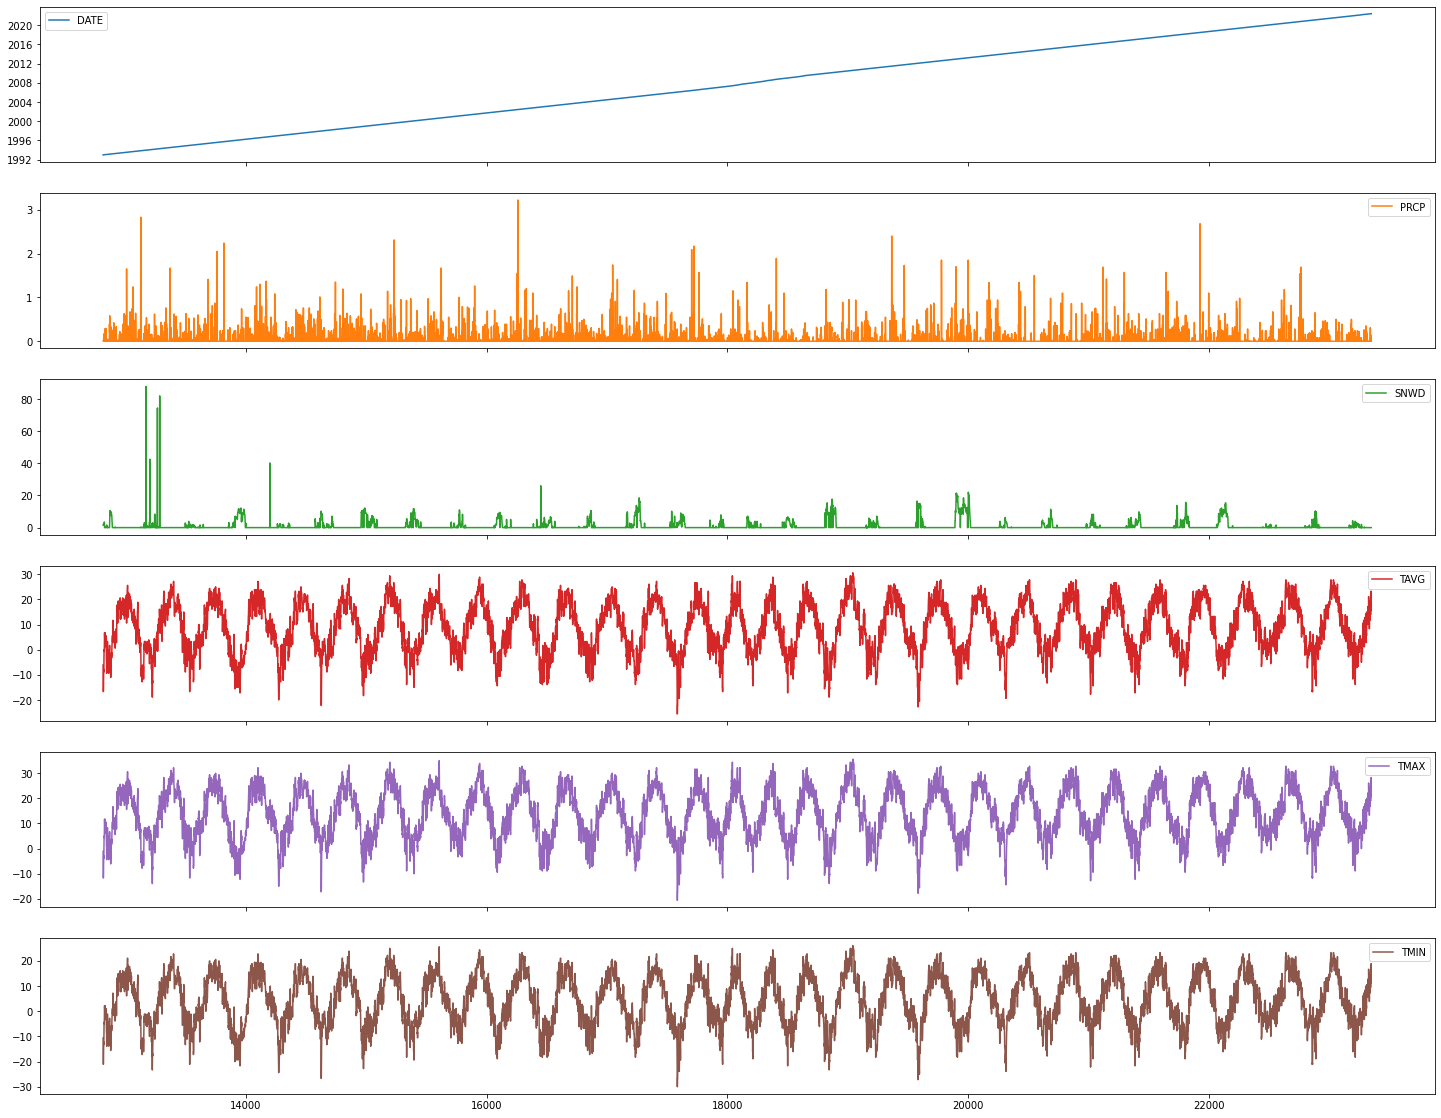

In [21]:
# see how the weather in Kyiv has changed over 30 years on the charts
df_kyiv.plot(subplots=True, figsize=(25,20))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fddcd516d90>,
      dtype=object)

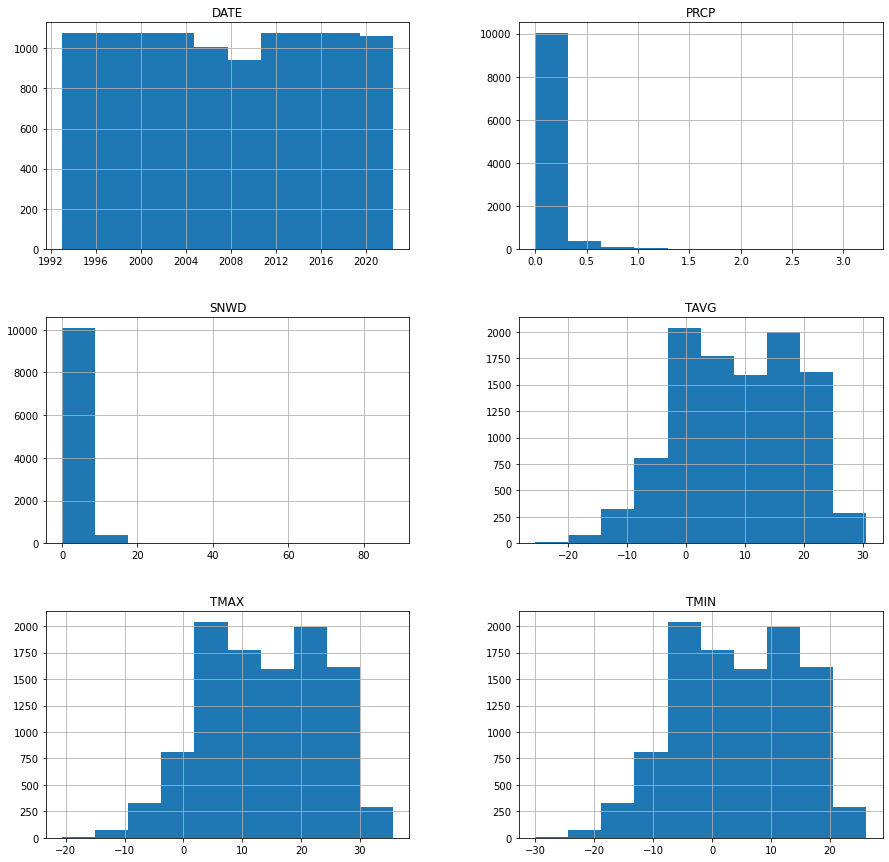

In [22]:
# the most common indicators for 30 years
df_kyiv.hist(bins=10,figsize=(15,15))

In [23]:
# creating a new data frame for training
DATE_TAVG = df_kyiv[['DATE', 'TAVG']] 
DATE_TAVG.columns = ['ds', 'y']

Average temperature forecast

In [24]:
# choice of parameters and training model
n_TAVG = NeuralProphet(n_changepoints=100,
                      changepoints_range=0.95,
                      n_lags=365,
                      n_forecasts=211,
                      #trend_reg=1,
                      #batch_size=64,
                      #learning_rate=1,
                      yearly_seasonality=True,
                      weekly_seasonality=False,
                      daily_seasonality=False)
model_TAVG = n_TAVG.fit(DATE_TAVG, freq='D')
model_TAVG.tail()

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 98.946% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.forecaster.__handle_missing_data) - 216 missing dates added.
INFO - (NP.forecaster.__handle_missing_data) - 216 NaN values in column y were auto-imputed.
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 64
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 102


  0%|          | 0/150 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 9.70E-04, min: 4.76E-02


  0%|          | 0/150 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 1.11E-03, min: 4.76E-02
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 4.76E-03
Epoch[102/102]: 100%|██████████| 102/102 [07:46<00:00,  4.58s/it, SmoothL1Loss=0.00346, MAE=3.22, RMSE=4.07, RegLoss=0]


,SmoothL1Loss,MAE,RMSE,RegLoss
97,0.003483,3.233652,4.080536,0.0
98,0.003475,3.229776,4.075805,0.0
99,0.003469,3.227417,4.072166,0.0
100,0.003464,3.224992,4.069816,0.0
101,0.003462,3.224130,4.068264,0.0


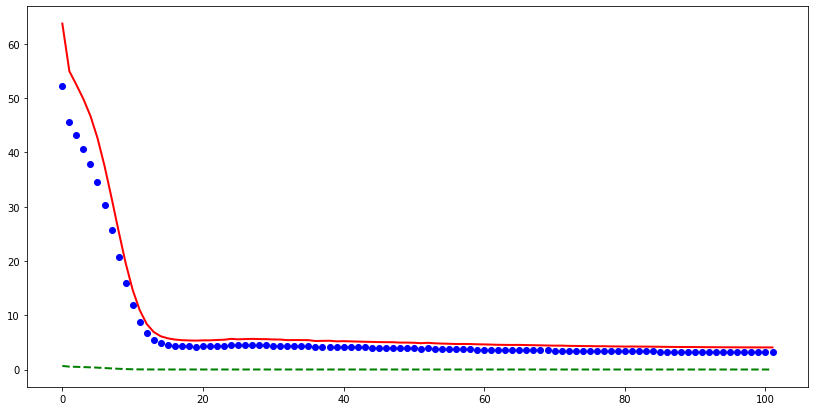

In [25]:
# plot how our mistakes changed during training
fig, ax = plt.subplots(figsize=(14, 7))
ax.plot(model_TAVG["MAE"], 'ob', linewidth=6)
ax.plot(model_TAVG["RMSE"], '-r', linewidth=2)
ax.plot(model_TAVG["SmoothL1Loss"], '--g', linewidth=2)

In [26]:
# creating a forecast for 211 days
future_TAVG = n_TAVG.make_future_dataframe(DATE_TAVG, periods=211, n_historic_predictions=True)
forecast_TAVG = n_TAVG.predict(future_TAVG)

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 98.946% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 98.967% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 98.967% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.forecaster.__handle_missing_data) - 216 missing dates added.
INFO - (NP.forecaster.__handle_missing_data) - 216 NaN values in column y were auto-imputed.
WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.7/dist-packages/neuralprophet/forecaster.py:2284: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all col

In [27]:
# creating a data frame with no future forecast to evaluate the accuracy of the forecast
forecast_without_future_TAVG = forecast_TAVG.loc[(forecast_TAVG['ds'] >= '1992-12-31') & (forecast_TAVG['ds'] <= '2022-06-03')]

In [28]:
# creating a column with the difference between the actual temperature and the forecast
forecast_without_future_TAVG['TAVG_diff'] = forecast_without_future_TAVG['y'] - forecast_without_future_TAVG['yhat1']

WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  



In [29]:
# average daily error
abs(forecast_without_future_TAVG["TAVG_diff"]).mean()

1.9784049528019065

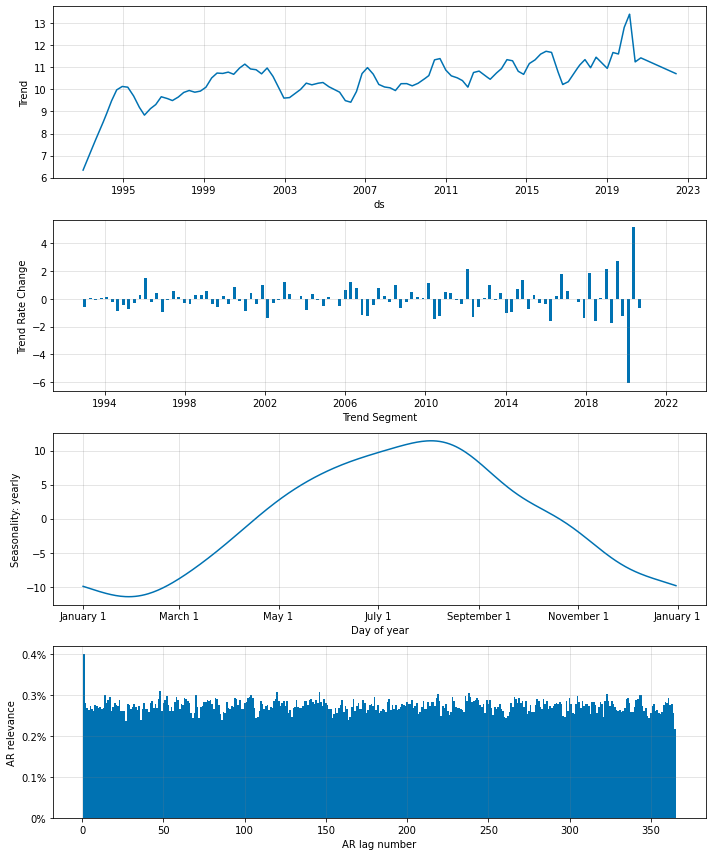

In [30]:
# plot parameters
n_TAVG = n_TAVG.highlight_nth_step_ahead_of_each_forecast()
plot1 = n_TAVG.plot_parameters()

WARNING - (NP.plotting.plot) - Legend is available only for the ten first handles


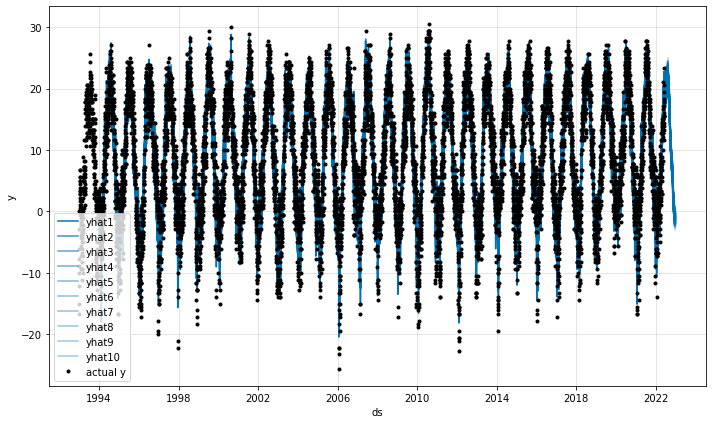

In [31]:
# plot the actual temperature and the forecast
plot2 = n_TAVG.plot(forecast_TAVG)

WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.7/dist-packages/neuralprophet/utils.py:390: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[forecast_name] = None

WARNING - (NP.plotting.plot) - Legend is available only for the ten first handles


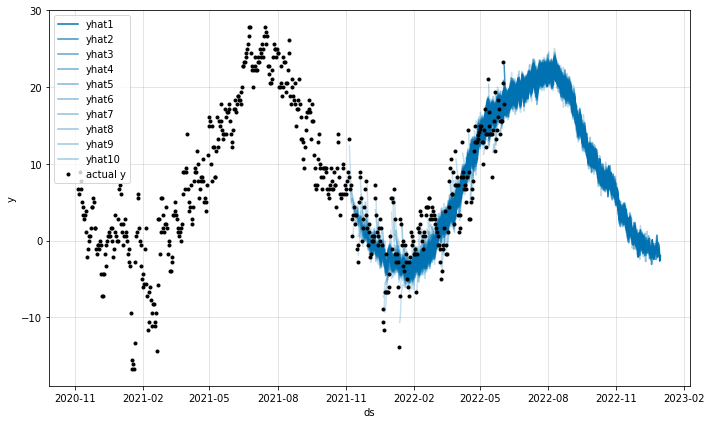

In [32]:
# plot the actual temperature and the forecast closer
plot3 = n_TAVG.plot_last_forecast(forecast_TAVG, include_previous_forecasts=211)

WARNING - (NP.plotting.plot) - Legend is available only for the ten first handles


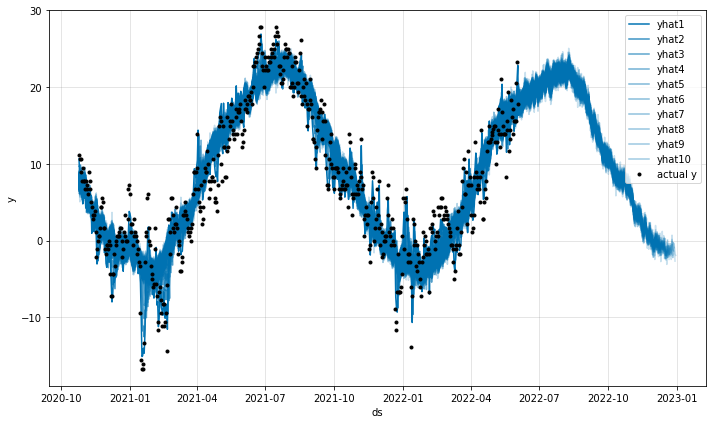

In [33]:
plot4 = n_TAVG.plot(forecast_TAVG[10160:])

In [34]:
# writing the forecast to another data frame
future_forecast = forecast_TAVG.loc[(forecast_TAVG['ds'] >= '2022-06-04')][['ds', 'yhat211']].rename(columns={"ds": "Date", "yhat211": "Tavg"})
future_forecast

,Date,Tavg
10747,2022-06-04,17.125181
10748,2022-06-05,17.51483
10749,2022-06-06,17.982573
10750,2022-06-07,17.716814
10751,2022-06-08,17.478907
...,...,...
10953,2022-12-27,-0.20705
10954,2022-12-28,-1.321548
10955,2022-12-29,-0.857958
10956,2022-12-30,-1.752785
